# 1. Getting Data

In [372]:
import pandas as pd

accessing my score for the Lord of the Rings

In [391]:
df = pd.read_csv('recommendation_data.csv')

In [392]:
df.head(6)

,USER,The Devil wears Prada,The Wolf of Wall Street,Cool Runnings,The Lord of the Rings,Baby Driver
0,ADRIANA,3.0,4.0,NaN,2.0,NaN
1,DANI,4.0,NaN,NaN,3.0,4.0
2,HENRY,5.0,5.0,4.0,4.0,NaN
3,MARTA,3.0,3.0,4.0,3.0,4.0
4,PHILIP,3.0,4.5,4.0,4.5,4.0
5,OTA,2.5,3.5,3.0,NaN,4.5


# 2. Calc the Similarity

In [364]:
import matplotlib.pyplot as plt

First, lets check the data dispersion for an example of 2d with 'The Devil wears Prada' and 'The Wolf of Wall Street' movies

In [437]:
%matplotlib inline

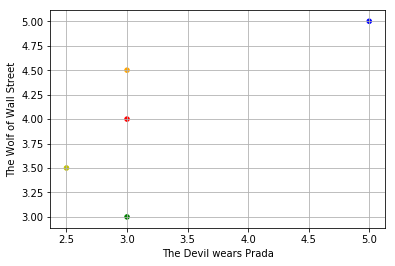

In [438]:
plot = df.plot.scatter(x = 'The Devil wears Prada', y = 'The Wolf of Wall Street', color = ['r','b','g','orange','y'], grid= True)

In [436]:
#importing the database

score = reccomendation.score

In [426]:
#building a function for the euclidian distance

def euclidian_distance(database, user1, user2):
    si = {}
    for item in database[user1]:
        if item in database[user2]: si[item] = 1

    if len(si) == 0: return 0

    sum_for_pow = sum([pow(database[user1][item] - database[user2][item], 2)
                for item in database[user1] if item in database[user2]])
    return 1/(1 + sqrt(sum))

In [427]:
#building a function for checking the similarity

def getSimilar(database, user):
    similarity = [(euclidiana(database, user, other), other)
                    for other in database if other != user]
    similarity.sort()
    similarity.reverse()
    return similarity[0:5]

# 3. Getting the prediction in order to recommend a movie

In [428]:
#building a function for getting the recommendation

def getRecommendation(database, user):
    totais={}
    sumSimilarity={}
    for other in database:
        if other == user: continue
        similarity = euclidiana(database, user, other)

        if similarity <= 0: continue

        for item in database[other]:
            if item not in database[user]:
                print(totais)
                totais.setdefault(item, 0)
                totais[item] += database[other][item] * similarity
                sumSimilarity.setdefault(item, 0)
                sumSimilarity[item] += similarity
    rankings=[(total / sumSimilarity[item], item) for item, total in totais.items()]
    rankings.sort()
    rankings.reverse()
    return rankings[0:30]

In [430]:
getSimilar(score, 'Adriana')

[(0.585786437626905, 'Ota'),
 (0.4142135623730951, 'Marta'),
 (0.4142135623730951, 'Dani'),
 (0.28172904669025317, 'Philip'),
 (0.25, 'Henry')]

In [435]:
getRecommendation(score, 'Adriana')

{}
{'Cool Runnings': 1.7573593128807148}
{'Cool Runnings': 1.7573593128807148, 'Baby Driver': 2.6360389693210724}
{'Cool Runnings': 1.7573593128807148, 'Baby Driver': 4.292893218813453}
{'Cool Runnings': 2.757359312880715, 'Baby Driver': 4.292893218813453}
{'Cool Runnings': 4.414213562373095, 'Baby Driver': 4.292893218813453}
{'Cool Runnings': 4.414213562373095, 'Baby Driver': 5.535533905932738}
{'Cool Runnings': 5.541129749134107, 'Baby Driver': 5.535533905932738}


[(3.9284643578672473, 'Baby Driver'), (3.6175652352531493, 'Cool Runnings')]